필요 모듈, 패키지, 라이브러리 설치

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install konlpy

In [5]:
import nltk  # natural language toolkit
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import konlpy
from konlpy.tag import Okt
okt = Okt() # 형태소 추출
from konlpy.tag import Twitter # 한글 형태소 추출

from collections import Counter # count

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Zipbob_textmining/recipe_10000_comment.csv',encoding='cp949')

In [4]:
df.head()

,agricultural,title,comment
0,귀리,오트밀쿠키귀리로_만든_건강쿠키,엄청 쉬운데 맛은 대박입니당♡♡♡ 감사해요
1,귀리,사과바나나귀리요거트우유,집에 우유+귀리+사과 밖에 없어서 만들어 먹었는데 너무 맛있어요!! 아침 대용으로 ...
2,귀리,사과바나나귀리요거트우유,"간편하면서도 맛있고, 건강해지는 느낌이에요. 좋은 레시피 감사합니다."
3,귀리,사과바나나귀리요거트우유,너무너무 잘 마셨어요^^ 넘 맛있어요 고맙습니다
4,귀리,귀리강정,너무 맛있어요~ 넣는 속재료는 있는대로 조금바꿔서하긴했는데 그램수는비슷하게했더니 달...


In [6]:
df.shape

(3757, 3)

In [7]:
df=df.dropna(how='any')

# 전체 데이터 테스트

### 불용어 사전

In [8]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

분석하고자 하는 데이터셋의 특화된 불용어들 처리

In [9]:
mangae_stopwords = list(df['agricultural'].unique()) # 재료 고유값

In [10]:
etc_stopwords = ['레시피', '래시피', '레싀피', '레쉬피', '래싀피', '래쉬피', '레시퓌', '래시퓌', '요리', '신고', '답글', '광고'] # 기타 해석에 제한걸리는 불용어 추가
for k in etc_stopwords :
  mangae_stopwords.append(k) # 불용어 추가

In [11]:
print(mangae_stopwords)

['귀리', '쌀', '가지', '갈치', '감귤', '감자', '레시피', '래시피', '레싀피', '레쉬피', '래싀피', '래쉬피', '레시퓌', '래시퓌', '요리', '신고', '답글', '광고']


In [12]:
for word in mangae_stopwords:
    stopwords.append(word)

### BoW, CounterVectorizer사용해서 전체 = 딕셔너리 타입

In [18]:
import re
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

# lambda로 함수를 적용한 카운터벡터를 만들고
# 텍스트 분석을 원하는 데이터셋의 컬럼에다가 적용하면 됨

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))

In [14]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function <lambda> at 0x7f9200606950>,
                vocabulary=None)

### 벡터화 -> transform

In [19]:
bow_vect = vect.fit_transform(df['comment'].tolist())

In [20]:
bow_vect

<3756x2768 sparse matrix of type '<class 'numpy.int64'>'
	with 11884 stored elements in Compressed Sparse Row format>

In [21]:
word_list = vect.get_feature_names()

In [22]:
print(word_list[:50]) # 명사 토큰화 결과

['가감', '가게', '가격', '가구', '가기', '가까이', '가끔', '가능', '가니쉬', '가도', '가득', '가락', '가래떡', '가루', '가루라', '가면', '가모', '가미', '가비', '가성', '가스', '가스레인지', '가스렌지', '가슴', '가시', '가안', '가열', '가요', '가용', '가운데', '가원', '가을', '가장', '가정', '가제', '가족', '가지선입견', '가지찜', '가지홀릭', '가치', '가해', '각각', '각자', '각장', '간격', '간고', '간과', '간다', '간단', '간도']


In [23]:
count_list = bow_vect.toarray().sum(axis=0)

In [24]:
count_list

array([6, 2, 2, ..., 1, 1, 1])

In [25]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

- shape는 결과 잘 나왔다는 거 수치로 확인하려고 출력

In [26]:
bow_vect.shape

(3756, 2768)

이건 딕셔너리 타입! 리스트랑 다르고, 튜플이랑 다르다.

In [27]:
word_count_dict = dict(zip(word_list, count_list))

In [ ]:
# 보고싶으면 출력. 코드 올릴 때는 제외하기
word_count_dict # len(word_count_dict)

이제 리스트로 옮기기(긍정/부정을 위해)

In [29]:
word_count_dictlist = list(word_count_dict.keys())

In [31]:
# 딕셔너리의 key, value값 선택해서 리스트 타입으로 변환
word_count_dictlist2 = []
for k, v in zip(word_count_dict.keys(), word_count_dict.values()):
  word_count_dictlist2.append([k, v])

긍정어/부정어 사전불러오기

In [32]:
import json

In [33]:
with open('/content/drive/MyDrive/Zipbob_textmining/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
    SentiWorddata = json.load(f)

## 레시피 데이터셋 긍정/부정 비율 및 점수 코드 직접 짜기

긍정 개수, 부정 개수까지 같이 출력하고 비율 구해보기

In [34]:
pos_cnt = 0
pos_sum = 0
neg_cnt = 0
neg_sum = 0

for i in range(0, len(SentiWorddata)):
  for k in range(0, len(word_count_dictlist2)) :                # 데이터셋에서 최종 추출된 [단어, 빈도수] 리스트 길이만큼
    if SentiWorddata[i]['word'] == word_count_dictlist2[k][0]: # 사전에 등록된 word에 데이터셋단어가 있으면
      knuword = [SentiWorddata[i]['word_root'], int(SentiWorddata[i]['polarity'])]   # word_root어근과 점수 변수를 만들어서

      if int(SentiWorddata[i]['polarity']) >= 0 :   # 그 어근의 점수가 0 이상이면
        pos_cnt += 1         # 긍정개수 1 증가
        pos_sum += int(SentiWorddata[i]['polarity'])   # 긍정 점수 추가 # 0, 1, 2점
      else :
        neg_cnt += 1
        neg_sum += int(SentiWorddata[i]['polarity'])   # 부정 점수 추가 0, -1, -2점

In [35]:
pos_cnt, neg_cnt

(47, 35)

In [36]:
pos_sum, neg_sum

(68, -48)

In [37]:
pos_rate = pos_cnt/(pos_cnt+neg_cnt)
neg_rate = neg_cnt/(pos_cnt+neg_cnt)
print("긍정 비율 : %.3f, 부정 비율 : %.3f" % (pos_rate, neg_rate))

긍정 비율 : 0.573, 부정 비율 : 0.427


# 그래프 코드

전체 단어에서 상위 20개

In [38]:
word_count_dictlist2.sort(key=lambda x: -x[1]) # 리스트 인덱스 1번째 기준 내림차순 정렬

In [40]:
sorted_top20 = word_count_dictlist2[:21]

In [41]:
sorted_top20

[['정말', 228],
 ['양념', 151],
 ['간장', 146],
 ['진짜', 145],
 ['아이', 144],
 ['덕분', 141],
 ['최고', 138],
 ['처음', 126],
 ['조금', 122],
 ['가루', 121],
 ['해먹', 109],
 ['신랑', 103],
 ['조림', 103],
 ['소스', 98],
 ['대신', 96],
 ['감사', 95],
 ['남편', 94],
 ['반찬', 93],
 ['재료', 86],
 ['보고', 82],
 ['한번', 80]]

In [42]:
import matplotlib.pylab as plt2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = "/content/drive/MyDrive/Zipbob_textmining/Nanum.TTF"

In [43]:
fontprop = fm.FontProperties(fname=path, size=13) # 글자 크기 조정

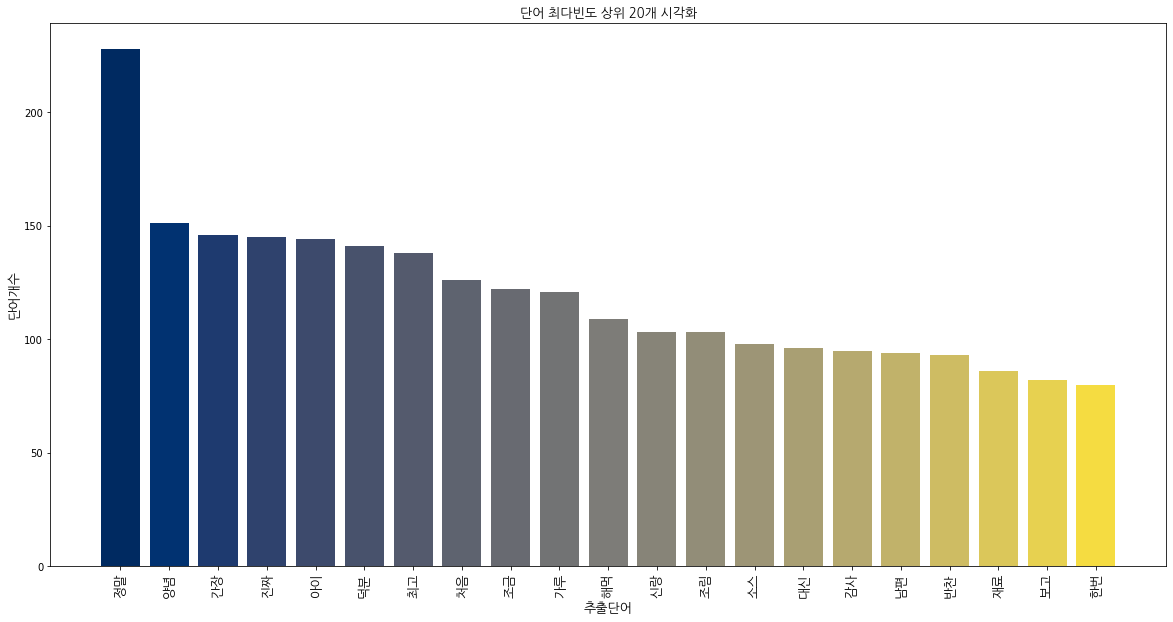

In [44]:
#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})

for i in range(len(sorted_top20)):
    word = sorted_top20[i][0]
    count = sorted_top20[i][1]
    
    insert_data = pd.DataFrame({'word':[word],
                                'count':[count]})
    test = test.append(insert_data)

test.index = range(len(test))

#차트에 컬러넣기
import seaborn as sns
colors = sns.color_palette('cividis',len(test))
#그리고 밑에다가 plt.차트형식(괄호 안에 color=추가)

index = np.arange(len(test))
plt.bar(index,test['count'].tolist(),color=colors)
plt.xlabel('추출단어', fontsize=8, fontproperties=fontprop)
plt.ylabel('단어개수', fontsize=8, fontproperties=fontprop)
plt.xticks(index, test['word'].tolist(), fontsize=5, fontproperties=fontprop, rotation=90)
plt.title('단어 최다빈도 상위 20개 시각화',  fontsize=12, fontproperties=fontprop)
plt.rcParams['figure.figsize'] = [20, 10]
fig2 = plt.figure(1)
fig2.set_size_inches(20, 10) # 사이즈 조정

plt.show()

# 재료-레시피별 [단어, 빈도수]담고 긍정/부정 계산

불용어 사전

In [49]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

분석하고자 하는 데이터셋의 특화된 불용어들 처리

In [50]:
mangae_stopwords = list(df['agricultural'].unique()) # 재료 고유값

In [51]:
etc_stopwords = ['레시피', '래시피', '레싀피', '레쉬피', '래싀피', '래쉬피', '레시퓌', '래시퓌', '요리', '신고', '답글', '광고'] # 기타 해석에 제한걸리는 불용어 추가
for k in etc_stopwords :
  mangae_stopwords.append(k) # 불용어 추가

In [52]:
for word in mangae_stopwords:
    stopwords.append(word)

데이터 카피

In [53]:
df2 = df.copy()

In [54]:
import json
with open('/content/drive/MyDrive/Zipbob_textmining/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
    SentiWorddata = json.load(f)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

# lambda로 함수를 적용한 카운터벡터를 만들고
# 텍스트 분석을 원하는 데이터셋의 컬럼에다가 적용하면 됨

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))

## 직접 for문 돌리기

In [56]:
final_resultlist = {}
final_resultlist['agri'] = []
final_resultlist['bestrecipe'] = []
final_resultlist['top20words'] = []

for z in (df2['agricultural'].unique()) :
  agr_df = df2[df2['agricultural']==z]
  agr_resultlist = []

  for q in (agr_df['title'].unique()) :
    title_df = agr_df[agr_df['title']==q]

    try :
      bow_vect = vect.fit_transform(title_df['comment'].tolist())
      word_list = vect.get_feature_names()
      count_list = bow_vect.toarray().sum(axis=0)

      word_count_dict = dict(zip(word_list, count_list))
      word_count_dictlist = list(word_count_dict.keys())
      word_count_dictlist2 = []
      for k, v in zip(word_count_dict.keys(), word_count_dict.values()):
        word_count_dictlist2.append([k, v])

      pos_cnt = 0
      neg_cnt = 0

      for i in range(0, len(SentiWorddata)):
        for k in range(0, len(word_count_dictlist2)) :  # 데이터셋에서 최종 추출된 [단어, 빈도수] 리스트 길이만큼
          if SentiWorddata[i]['word'] == word_count_dictlist2[k][0]: # 사전에 등록된 word에 데이터셋단어가 있으면
            knuword = [SentiWorddata[i]['word_root'], int(SentiWorddata[i]['polarity'])]   # word_root어근과 점수 변수를 만들어서

            if int(SentiWorddata[i]['polarity']) >= 0 :  # 그 어근의 점수가 0 이상이면
              pos_cnt += 1         # 긍정개수 1 증가
            else :
              neg_cnt += 1
      
      if pos_cnt == 0 and neg_cnt == 0 :
        pos_rate = 0
        neg_rate = 0
      else :
        pos_rate = pos_cnt/(pos_cnt+neg_cnt)
        neg_rate = neg_cnt/(pos_cnt+neg_cnt)

    except :
        pos_rate = 0
        neg_rate = 0

    # 각 재료-레시피-비율 넣고
    agr_resultlist.append([q, pos_rate, neg_rate, word_count_dictlist2])

  agr_resultlist.sort(key=lambda x: -x[1])
  final_resultlist['agri'].append(z)
  final_resultlist['bestrecipe'].append(agr_resultlist[0][0])
  final_resultlist['top20words'].append(word_count_dictlist2)

In [57]:
# index값 변경하며 결과 확인
# print(agr_resultlist[0][3])

[['대신', 1], ['도시락', 1], ['독립', 1], ['만들기', 1], ['반찬', 1], ['싸가지', 1], ['양배추', 1], ['양파', 1], ['완전', 1], ['요즘', 1], ['인스턴트', 1], ['최고', 1], ['해방', 1]]


In [58]:
print(final_resultlist)

{'agri': ['귀리', '쌀', '가지', '갈치', '감귤', '감자'], 'bestrecipe': ['귀리현미견과강정', '쌀떡볶이강정', '전자레인지_분_완성_가지무침_레시피', '칼칼한갈치감자조림_초보분들도_따라하기쉬워요', '감귤_그라니따Tangerine_Granita_제철과일_디저트', '스팸감자볶음만들기'], 'top20words': [[['대체', 1], ['미숫가루', 1], ['박력', 1], ['분량', 1]], [['방법', 1], ['성공', 1], ['완전', 2], ['추천', 1], ['한번', 1]], [['거주', 1], ['오피스텔', 1], ['의정부동', 1], ['혼자', 1]], [['가루', 3], ['대신', 1], ['생각', 1], ['아들', 1], ['아주', 1], ['전분', 1], ['조림', 1]], [['괜시리', 1], ['구입', 1], ['남편', 1], ['막대기', 1], ['방법', 1], ['보고', 1], ['부부', 1], ['부터', 1], ['순수', 1], ['아이스크림', 5], ['어캐', 1], ['우리', 1], ['정말', 1], ['정보', 1], ['젤라틴', 1], ['젤리', 1]], [['가루', 1], ['간도', 1], ['간이', 1], ['고추', 2], ['굿굿굿', 1], ['도전', 1], ['돼지고기', 1], ['뚝딱', 1], ['색깔', 1], ['스푼', 1], ['아들', 1], ['야채', 1], ['오늘', 1], ['자주', 1], ['자투리', 2], ['재료', 1], ['저녁', 1], ['초보', 1], ['최고', 1], ['추가', 2], ['해먹', 1]]]}


In [59]:
finaldf = pd.DataFrame(final_resultlist)

In [60]:
finaldf

,agri,bestrecipe,top20words
0,귀리,귀리현미견과강정,"[[대체, 1], [미숫가루, 1], [박력, 1], [분량, 1]]"
1,쌀,쌀떡볶이강정,"[[방법, 1], [성공, 1], [완전, 2], [추천, 1], [한번, 1]]"
2,가지,전자레인지_분_완성_가지무침_레시피,"[[거주, 1], [오피스텔, 1], [의정부동, 1], [혼자, 1]]"
3,갈치,칼칼한갈치감자조림_초보분들도_따라하기쉬워요,"[[가루, 3], [대신, 1], [생각, 1], [아들, 1], [아주, 1], ..."
4,감귤,감귤_그라니따Tangerine_Granita_제철과일_디저트,"[[괜시리, 1], [구입, 1], [남편, 1], [막대기, 1], [방법, 1]..."
5,감자,스팸감자볶음만들기,"[[가루, 1], [간도, 1], [간이, 1], [고추, 2], [굿굿굿, 1],..."
